In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

from sklearn.metrics import classification_report

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
df = pd.read_csv("IBM_hr_data_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:

#Get list of columns in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
#Dropping columns (intution)
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']

In [5]:
df.drop(columns, inplace=True, axis=1)

In [6]:
#Find number of missing values in every feature
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [7]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [8]:
#Deep copy the original data
data_encoded = df.copy(deep=True)
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [9]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

imbalanced data

In [10]:
data_correlation = data_encoded.corr()

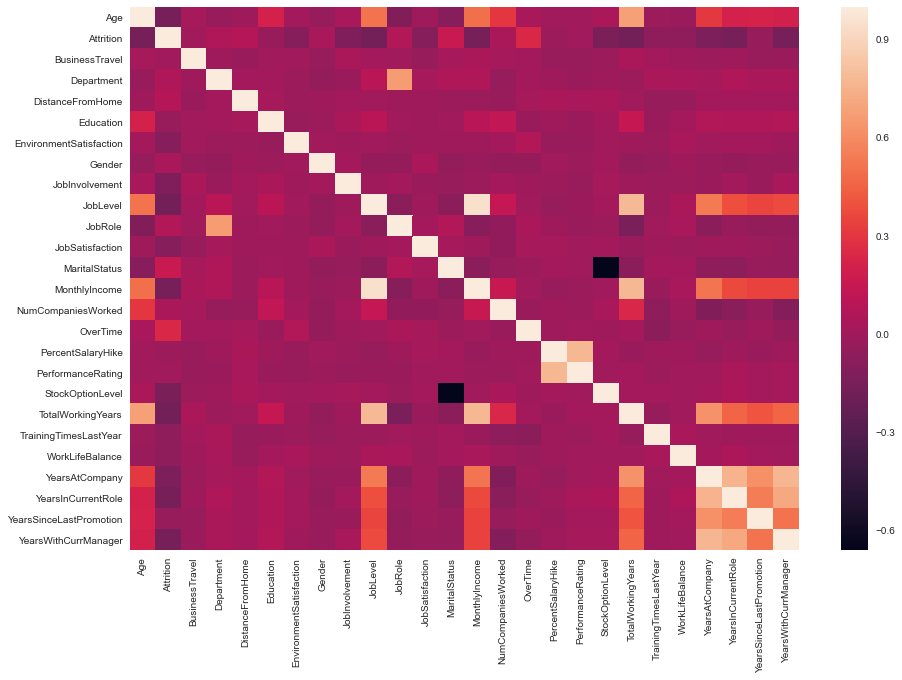

In [11]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

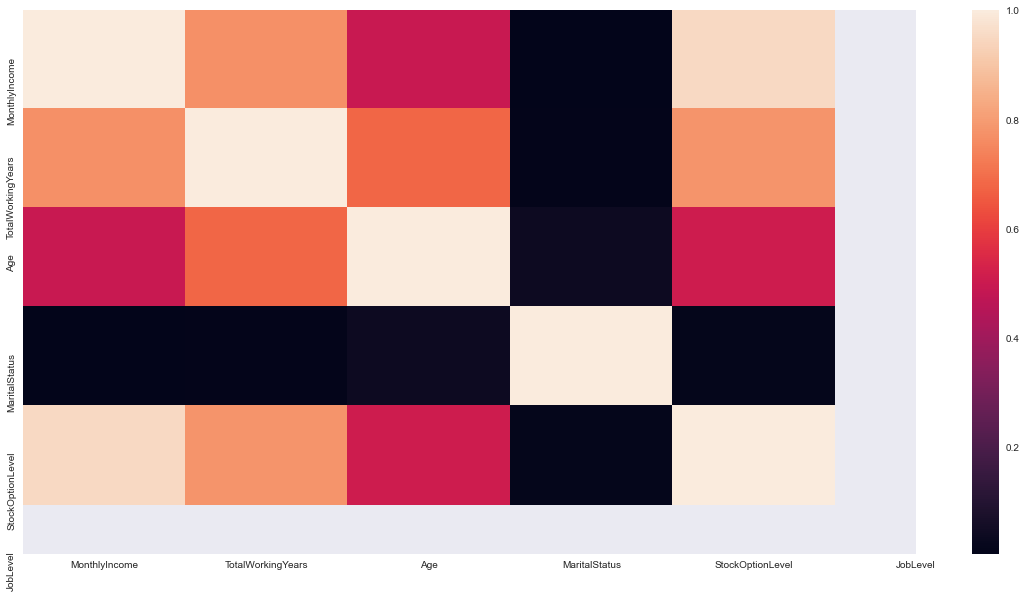

In [12]:
#Viewing the analysis obtained above 
data_corr_filtered = df[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

In [13]:
input_data = data_encoded.drop(['Attrition'], axis=1)

In [14]:
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,2,0,3,2,7,...,11,3,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,1,2,2,6,...,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,1,2,1,2,...,15,3,0,7,3,3,0,0,0,0
3,33,1,1,3,4,4,0,3,1,6,...,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,1,1,3,1,2,...,12,3,1,6,3,3,2,2,2,2


In [15]:
target_data = data_encoded[['Attrition']]


In [16]:
len(input_data.columns)

25

In [17]:
input_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
col_values = list(input_data.columns.values)

In [19]:
#gives top 10 features having maximum mutual information value
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


JobRole 0.03584818280982227
MonthlyIncome 0.03455608160672785
OverTime 0.028575326115374278
JobLevel 0.02164764685690601
StockOptionLevel 0.02075442485166712
YearsInCurrentRole 0.01849587732820268
EnvironmentSatisfaction 0.016839675882740712
BusinessTravel 0.016465993677477808
Age 0.01426966876761071
PerformanceRating 0.010824028665458618


In [20]:

#gives top 10 features having maximum chi-square value
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 127922.29369381821
TotalWorkingYears 230.72161773754925
YearsAtCompany 142.10005430324915
YearsInCurrentRole 117.5225958913567
YearsWithCurrManager 110.6715338985734
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
StockOptionLevel 25.26882603175403
JobLevel 24.93924234571862


In [21]:

#column selection based on feature selection 
data_selected = df[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'Attrition']]

In [22]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,Yes
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,No
2,2090,7,0,0,0,37,Yes,2,0,1,Laboratory Technician,3,Male,Yes
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,No
4,3468,6,2,2,2,27,No,2,1,1,Laboratory Technician,3,Male,No


In [23]:
#encoding labels
data_selected.loc[data_selected.Attrition == 'No', 'Attrition'] = 0
data_selected.loc[data_selected.Attrition == 'Yes', 'Attrition'] = 1

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
le = preprocessing.LabelEncoder()
data_selected.JobRole = le.fit_transform(data_selected.JobRole)
data_selected.OverTime = le.fit_transform(data_selected.OverTime)
data_selected.Gender = le.fit_transform(data_selected.Gender)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
X= data_selected.drop(['Attrition'], axis=1)
y = data_selected[['Attrition']]

In [26]:
y=y.astype('int') 

In [27]:
y.dtypes

Attrition    int32
dtype: object

In [28]:
X.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender
0,5993,8,6,4,5,41,1,1,0,2,7,1,0
1,5130,10,10,7,7,49,0,8,1,2,6,3,1
2,2090,7,0,0,0,37,1,2,0,1,2,3,1
3,2909,8,8,7,0,33,1,3,0,1,6,3,0
4,3468,6,2,2,2,27,0,2,1,1,2,3,1


In [29]:
X.isnull().sum()

MonthlyIncome           0
TotalWorkingYears       0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
Age                     0
OverTime                0
DistanceFromHome        0
StockOptionLevel        0
JobLevel                0
JobRole                 0
WorkLifeBalance         0
Gender                  0
dtype: int64

In [30]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [31]:
y.describe()

,Attrition
count,1470.000000
mean,0.161224
std,0.367863
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [32]:
y.dtypes

Attrition    int32
dtype: object

In [33]:
from sklearn.model_selection import train_test_split

# ADA Boost Classifier

In [36]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [37]:
clf =AdaBoostClassifier(algorithm='SAMME',n_estimators=100,learning_rate=0.1)

In [38]:
clf.fit(X_train,y_train)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)

In [47]:
y_pred_ada = clf.predict(X_test)

In [40]:
#Performance of model on train data
clf.score(X_train, y_train)

0.8493683187560739

In [41]:
clf.score(X_test, y_test)

0.8526077097505669

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_ada))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_ada))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

MAE: 0.1473922902494331
MSE: 0.1473922902494331
RMSE: 0.38391703563326424


# Logistic Regression

In [43]:
model = LogisticRegression(n_jobs=100,max_iter=200)

In [44]:
model.fit(X_train,y_train)

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=100, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
model.score(X_train,y_train)

0.859086491739553

In [49]:
y_pred_lr = model.predict(X_test)

In [50]:
model.score(X_test,y_test)

0.8435374149659864

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 0.1564625850340136
MSE: 0.1564625850340136
RMSE: 0.3955535172818131



# Logistic regression with Grid search CV

In [64]:
#grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [63]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)


In [66]:
#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954667 (0.017269) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.949667 (0.021053) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.947333 (0.020806) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.954667 (0.018209) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.952667 (0.017308) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.947333 (0.020806) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.956000 (0.018000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955000 (0.016882) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.948667 (0.019956) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.957333 (0.017689) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.957000 (0.017540) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.951667 (0.018988) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.960000 (0.017889) wi

# Ridge Classifier

In [67]:
from sklearn.linear_model import RidgeClassifier

In [69]:
# define models and parameters
model_1 = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [70]:
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [71]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969000 using {'alpha': 0.1}
0.969000 (0.015780) with: {'alpha': 0.1}
0.969000 (0.015780) with: {'alpha': 0.2}
0.969000 (0.015780) with: {'alpha': 0.3}
0.969000 (0.015780) with: {'alpha': 0.4}
0.969000 (0.015780) with: {'alpha': 0.5}
0.969000 (0.015780) with: {'alpha': 0.6}
0.969000 (0.015780) with: {'alpha': 0.7}
0.969000 (0.015780) with: {'alpha': 0.8}
0.969000 (0.015780) with: {'alpha': 0.9}
0.969000 (0.015780) with: {'alpha': 1.0}


# K-Nearest Neighbors (KNN)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# define models and parameters
model_2 = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [75]:
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [76]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948000 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.823667 (0.033910) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.823667 (0.033910) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.890333 (0.024150) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.890333 (0.024150) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.911333 (0.028952) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.911333 (0.028952) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.927667 (0.020114) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.927667 (0.020114) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.935333 (0.016680) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.935333 (0.016680) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.940667 

# Support Vector Classifer

In [77]:
from sklearn.svm import SVC

In [78]:
# define model and parameters
model_3 = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [79]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [80]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973000 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.968667 (0.013098) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.969333 (0.017114) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.955333 (0.022470) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.968667 (0.013098) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.969333 (0.017114) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.958667 (0.016275) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.970000 (0.013416) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.971000 (0.016803) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.965000 (0.018753) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.878333 (0.040090) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.973000 (0.016361) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.972333 (0.017829) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.878333 (0.040090) with: {'C': 0.01, 'gamma': 'scale',

# Bagged Decision Trees (Bagging)

In [81]:
from sklearn.ensemble import BaggingClassifier

In [82]:
# define models and parameters
model_4 = BaggingClassifier()
n_estimators = [10, 100, 1000]

In [83]:
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_4, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [84]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916667 using {'n_estimators': 1000}
0.863333 (0.034960) with: {'n_estimators': 10}
0.912000 (0.027252) with: {'n_estimators': 100}
0.916667 (0.026874) with: {'n_estimators': 1000}


# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# define models and parameters
model_5 = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [87]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_5, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [88]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.955000 using {'max_features': 'log2', 'n_estimators': 1000}
0.849333 (0.028744) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.944333 (0.016059) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.952333 (0.018382) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.846000 (0.034117) with: {'max_features': 'log2', 'n_estimators': 10}
0.947000 (0.017729) with: {'max_features': 'log2', 'n_estimators': 100}
0.955000 (0.017654) with: {'max_features': 'log2', 'n_estimators': 1000}


After training the above models:
* Logistic Regression with grid search cv : accuracy 0.960000  mean (0.017889) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
* Ridge Classifier ; accuracy 0.969000 mean (0.015780) using {'alpha': 0.1}
* K-Nearest Neighbors (KNN) : accuracy 0.948000 mean (0.016613) using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
* Support Vector Classifer : accuracy 0.973000 mean (0.016361) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
* Bagged Decision Trees (Bagging) : accuracy 0.916667 mean (0.026874) with: {'n_estimators': 1000}
* Random Forest : accuracy 0.955000 mean (0.017654) with: {'max_features': 'log2', 'n_estimators': 1000}